In [538]:
from UZ_utils import *
from a3_utils import *
import numpy as np
import cv2 as cv2
import matplotlib.pyplot as plt


In [539]:
def gausian_kernel(sigma,N=None):

    if N is None:
    #limit to  2 ∗ ⌈3σ⌉ + 1
        N = int(2*np.ceil(3*sigma)+1)

    else:
        N = N//2
    #create a kernel 1d from -N to N
    x = np.arange(-N,N+1)

    #calculate the kernel
    kernel = 1/(np.sqrt(2*np.pi)*sigma)*np.exp(-x**2/(2*sigma**2))

    #normalize the kernel
    kernel = kernel/np.sum(kernel)


    return (N,kernel)
    

In [540]:
#Implement a function that computes the derivative of a 1-D Gaussian kernel
def gaussdx(sigma,N=None):
    if N is None:
        N = int(2*np.ceil(3*sigma)+1)

    else:
        N = N//2
    
    x = np.arange(-N,N+1)

    kernel = -x/(np.sqrt(2*np.pi)*sigma**3)*np.exp(-x**2/(2*sigma**2))

    #normalize the kernel by dividing the values such that the sum of absolute values is 1
    kernel = kernel/np.sum(np.abs(kernel))

    return (N,kernel)



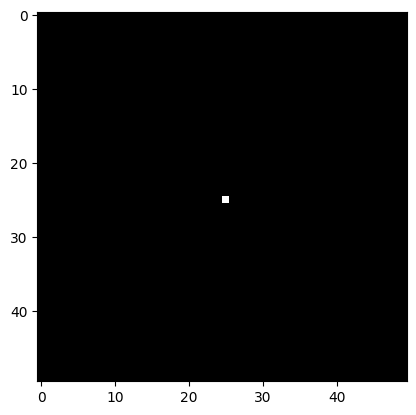

In [541]:
impulse = np.zeros((50, 50))
impulse[25, 25] = 1

#plot the impulse
plt.imshow(impulse, cmap='gray')

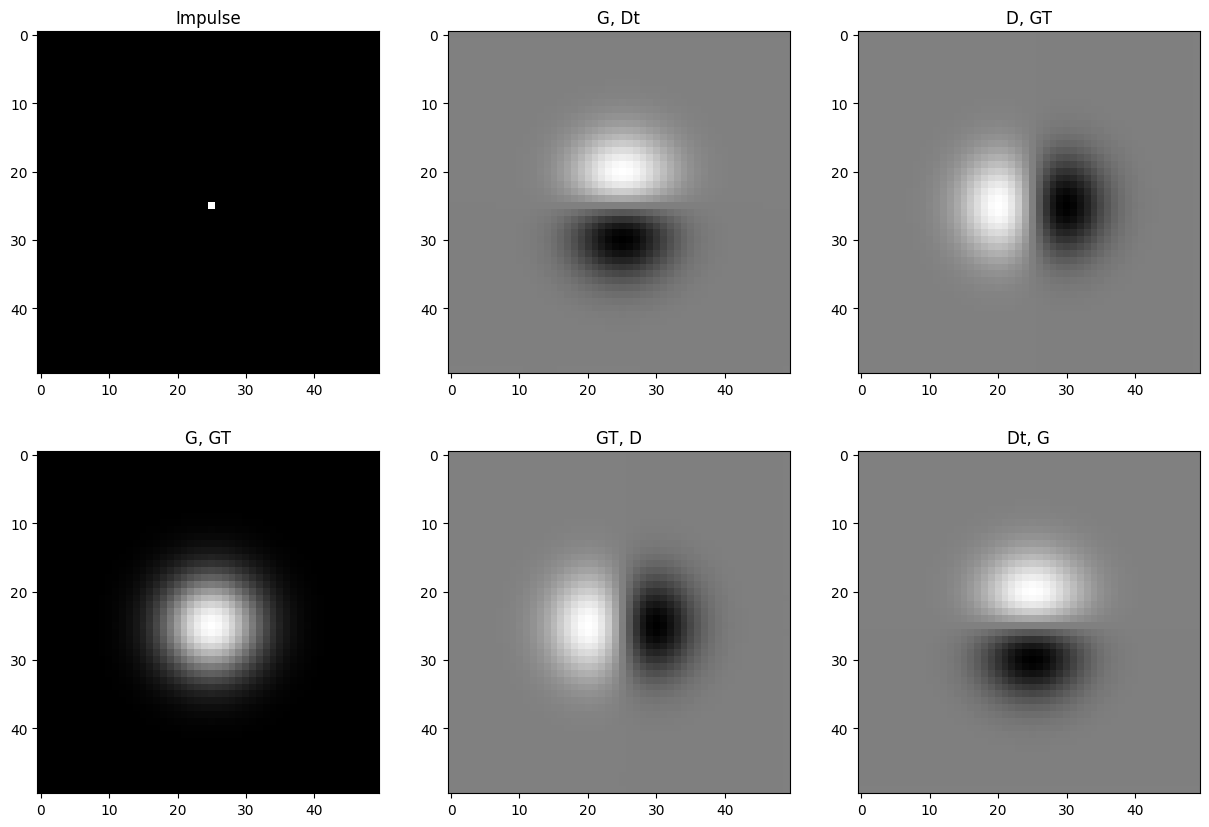

In [542]:
#First convolution with G and then convolution with GT
#use size 51 and sigma 5
#use cv2 filter2D function
k1=gausian_kernel(5,51)[1]
#make it into 2d
G=k1.reshape(1,-1)
GT=G.T

#flip the kernel
G=np.flip(G)
GT=np.flip(GT)

k2=gaussdx(5,51)[1]
#make it into 2d
D=k2.reshape(1,-1)
Dt=D.T

#flip the kernel
D=np.flip(D)
Dt=np.flip(Dt)

#make fig 3 wide 2 tall
fig, ax = plt.subplots(2, 3, figsize=(15, 10))

#plot the impulse
ax[0,0].imshow(impulse, cmap='gray')
ax[0,0].set_title('Impulse')

#plot the impulse convolved with G then Dt
ax[0,1].imshow(cv2.filter2D(cv2.filter2D(impulse, cv2.CV_64F, G), cv2.CV_64F, Dt), cmap='gray')
ax[0,1].set_title('G, Dt')

#plot the impulse convolved with D then GT
ax[0,2].imshow(cv2.filter2D(cv2.filter2D(impulse, cv2.CV_64F, D), cv2.CV_64F, GT), cmap='gray')
ax[0,2].set_title('D, GT')

#plot the impulse convolved with G then Gt

ax[1,0].imshow(cv2.filter2D(cv2.filter2D(impulse, cv2.CV_64F, G), cv2.CV_64F, GT), cmap='gray')
ax[1,0].set_title('G, GT')

#plot the impulse convolved with GT THEN D

ax[1,1].imshow(cv2.filter2D(cv2.filter2D(impulse, cv2.CV_64F, GT), cv2.CV_64F, D), cmap='gray')
ax[1,1].set_title('GT, D')

#plot the impulse convolved with DT THEN G

ax[1,2].imshow(cv2.filter2D(cv2.filter2D(impulse, cv2.CV_64F, Dt), cv2.CV_64F, G), cmap='gray')
ax[1,2].set_title('Dt, G')

plt.show()




In [543]:
#Implement a function that uses functions gauss and gaussdx to compute both partial derivatives of a given image with respect to x and with respect to y.
def gaussderivatives(image, sigma):
    #get the kernel
    k1=gausian_kernel(sigma)[1]
    #make it into 2d
    G=k1.reshape(1,-1)
    GT=G.T

    #flip the kernel
    G=np.flip(G)
    GT=np.flip(GT)

    k2=gaussdx(sigma)[1]
    #make it into 2d
    D=k2.reshape(1,-1)
    Dt=D.T

    #flip the kernel
    D=np.flip(D)
    Dt=np.flip(Dt)

    #convolve the image with the kernels
    Ix=cv2.filter2D(cv2.filter2D(image, cv2.CV_64F, D), cv2.CV_64F, GT)
    Iy=cv2.filter2D(cv2.filter2D(image, cv2.CV_64F, G), cv2.CV_64F, Dt)

    return (Ix,Iy)

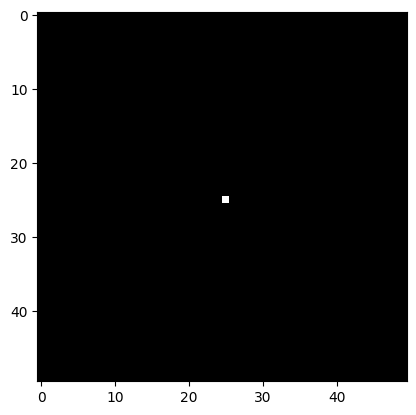

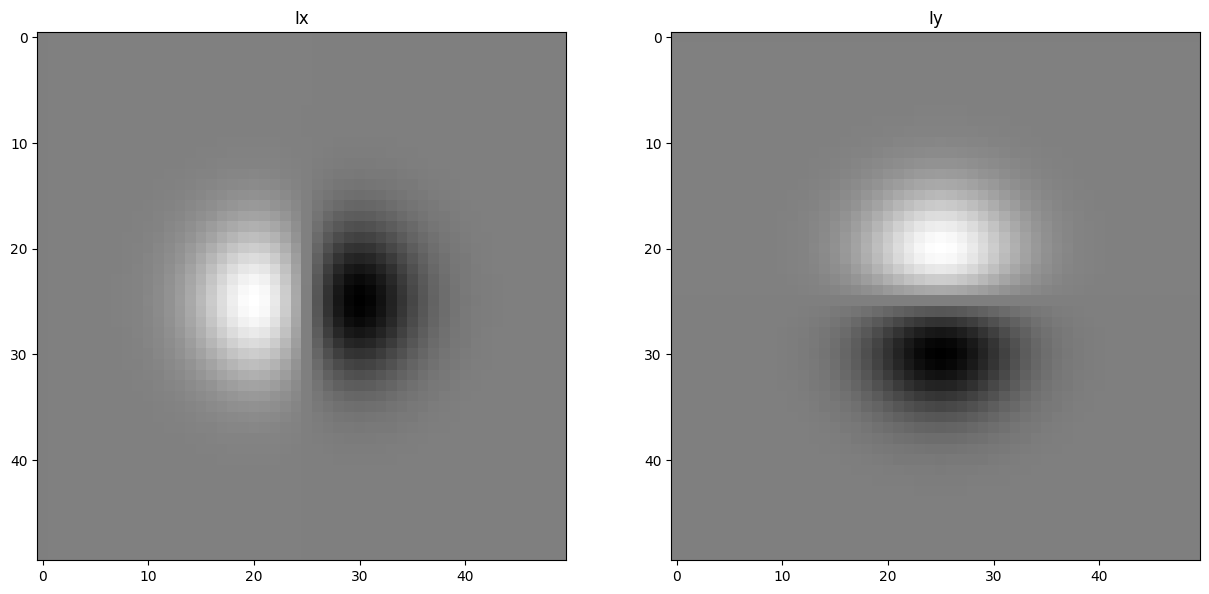

In [544]:
#inpulse
impulse = np.zeros((50, 50))
impulse[25, 25] = 1

#plot the impulse
plt.imshow(impulse, cmap='gray')

#compute the derivatives
Ix,Iy=gaussderivatives(impulse,5)

#plot the derivatives
fig, ax = plt.subplots(1, 2, figsize=(15, 10))

#plot the impulse
ax[0].imshow(Ix, cmap='gray')
ax[0].set_title('Ix')

#plot the impulse
ax[1].imshow(Iy, cmap='gray')
ax[1].set_title('Iy')

plt.show()


In [545]:
def gradient_magnitude(I, sigma):
    #get the derivatives
    Ix,Iy=gaussderivatives(I,sigma)

    #compute the magnitude
    M=np.sqrt(Ix**2+Iy**2)

    fi=np.arctan2(Iy,Ix)

    return M,fi

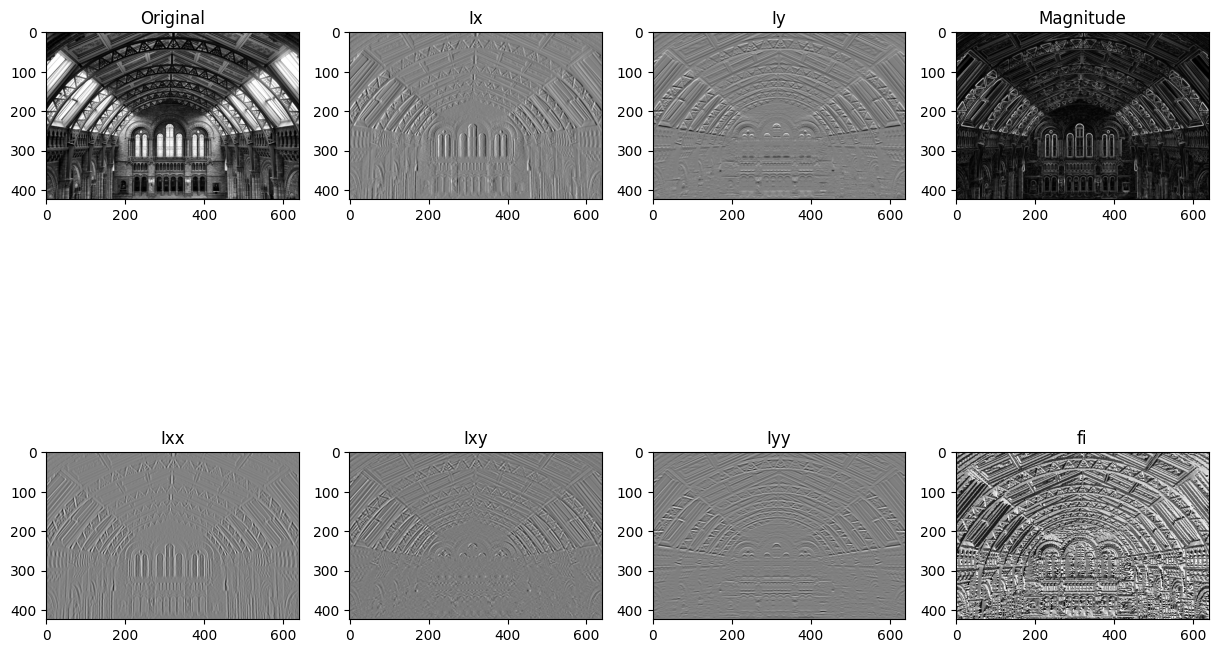

In [546]:
#Use all the implemented functions on the same image and display the results in the same window.
#load the image
I = imread_gray('images/museum.jpg')
#turn to int 255
I=I*255
I=I.astype(np.uint8)


Ix,Iy=gaussderivatives(I,1)
M,fi=gradient_magnitude(I,1)

#compute second derivatives with gaus deriv function
Ixx,Ixy=gaussderivatives(Ix,1)
Iyx,Iyy=gaussderivatives(Iy,1)

#make a 4 wide 2 tall figure
fig, ax = plt.subplots(2, 4, figsize=(15, 10))

#plot the image
ax[0,0].imshow(I, cmap='gray')
ax[0,0].set_title('Original')

#plot the Ix
ax[0,1].imshow(Ix, cmap='gray')
ax[0,1].set_title('Ix')

#plot the Iy
ax[0,2].imshow(Iy, cmap='gray')
ax[0,2].set_title('Iy')

#plot the magnitude
ax[0,3].imshow(M, cmap='gray')
ax[0,3].set_title('Magnitude')

#plot the Ixx
ax[1,0].imshow(Ixx, cmap='gray')
ax[1,0].set_title('Ixx')

#plot the Ixy
ax[1,1].imshow(Ixy, cmap='gray')
ax[1,1].set_title('Ixy')

#plot the Iyy
ax[1,2].imshow(Iyy, cmap='gray')
ax[1,2].set_title('Iyy')

#plot the fi
ax[1,3].imshow(fi, cmap='gray')
ax[1,3].set_title('fi')

plt.show()





# Exercize 2

In [547]:
def findedges1(I,sigma,theta):
    #create binary matrix 
    

    #get the magnitude and fi
    M,fi=gradient_magnitude(I,sigma)
    B=np.ones(M.shape)
    #higher than threshold theta: 1 else 0
    #set to 0
    B[M<theta]=0
    
    
    
    return B
    

In [548]:
def angle_to_neighbors(angle):
    #get the angle
    angle=angle*180/np.pi

    #get the nearest angle
    if angle<0:
        angle=angle+360
    if angle>360:
        angle=angle-360

    neigbours=[]

    #get the nearest angle
    if angle>337.5 or angle<=22.5:
        #add x,y to the list
        neigbours.append((0,1))
        neigbours.append((0,-1))
    if angle>22.5 and angle<=67.5:
        neigbours.append((1,1))
        neigbours.append((-1,-1))
    if angle>67.5 and angle<=112.5:
        neigbours.append((1,0))
        neigbours.append((-1,0))
    if angle>112.5 and angle<=157.5:
        neigbours.append((-1,1))
        neigbours.append((1,-1))
    if angle>157.5 and angle<=202.5:
        neigbours.append((0,-1))
        neigbours.append((0,1))
    if angle>202.5 and angle<=247.5:
        neigbours.append((-1,-1))
        neigbours.append((1,1))
    if angle>247.5 and angle<=292.5:
        neigbours.append((-1,0))
        neigbours.append((1,0))
    if angle>292.5 and angle<=337.5:
        neigbours.append((1,-1))
        neigbours.append((-1,1))

    return neigbours

In [549]:
print(angle_to_neighbors(3.14/2))

[(1, 0), (-1, 0)]


In [550]:
def nonmaxima(I,sigma,theta):
    #create binary matrix 
    

    #get the magnitude and fi
    M,fi=gradient_magnitude(I,sigma)
    B=np.ones(M.shape)
    #higher than threshold theta: 1 else 0
    #set to 0
    B[M<theta]=0


    

   


    #implement non-maxima suppression based on the image deriva- tive magnitudes and angles.
    #Iterate through all the pixels and for each search its 8-neighborhood.
    #Check the neighboring pixels parallel to the gradient direction
    #and set the current pixel to 0 if it is not the largest in the neighborhood (based on derivative magnitude)

    #set low gradient to 0

    #make threshold
   

    non_maxima_suppression=B.copy() 


    for i in range(1,I.shape[0]-1):
        for j in range(1,I.shape[1]-1):
            
            #get the 8 neighbors of the current pixel 
            neigbours_with_angle=angle_to_neighbors(fi[i,j])
    
            #get the current pixel
            current_pixel=M[i,j]
            
            #loop through the neighbors
            for pos in neigbours_with_angle:
                #if the current pixel is smaller than the neighbor
                if current_pixel<M[i+pos[0],j+pos[1]]:
                    #set the current pixel to 0
                    non_maxima_suppression[i,j]=0
                    break

            

    return non_maxima_suppression

            
            

            


            



        


   

In [551]:
def hysteresis(I,sigma,theta,tlow,thigh):
     #get the magnitude and fi
    M,fi=gradient_magnitude(I,sigma)
   

    non_maxima_suppression=M.copy() 


    for i in range(1,I.shape[0]-1):
        for j in range(1,I.shape[1]-1):
            
            #get the 8 neighbors of the current pixel 
            neigbours_with_angle=angle_to_neighbors(fi[i,j])
    
            #get the current pixel
            current_pixel=M[i,j]
            
            #loop through the neighbors
            for pos in neigbours_with_angle:
                #if the current pixel is smaller than the neighbor
                if current_pixel<M[i+pos[0],j+pos[1]]:
                    #set the current pixel to 0
                    non_maxima_suppression[i,j]=0
                    break

    #Canny’s algorithm is edge tracking by hysteresis.
    #Hysteresis uses two thresholds tlow < thigh, keeps all pixels above thigh and discards all pixels below tlow.
    #  The pixels between the thresholds are kept only if they are connected to a pixel above thigh.

    #use connected components to find the connected pixels
    #get the connected components cv2.connectedComponentsWithStats
    #get the labels


                

    #make a copy of the image
    hysteresissss=non_maxima_suppression.copy()

    #set all the pixels above the high threshold to 1
    hysteresissss[non_maxima_suppression>thigh]=1

    #set all the pixels below the low threshold to 0
    hysteresissss[non_maxima_suppression<tlow]=0




    #make image suitable for cv2.connectedComponentsWithStats
    hysteresissssimg=hysteresissss*255
    hysteresissssimg=hysteresissssimg.astype(np.uint8)

    
    
    num_labels,labels,stats,centroids=cv2.connectedComponentsWithStats(hysteresissssimg)
   
   

    

    #loop through the labels
    for i in range(1,num_labels):
        
        #get the pixels with the label
        pixels=np.where(labels==i)

        #check if the pixels are above the high threshold
        if np.any(non_maxima_suppression[pixels]>thigh):
            #set the pixels to 1
            hysteresissss[pixels]=1

        else:
            #set the pixels to 0
            hysteresissss[pixels]=0


   
    return hysteresissss
        


            
            

            


            



        


   

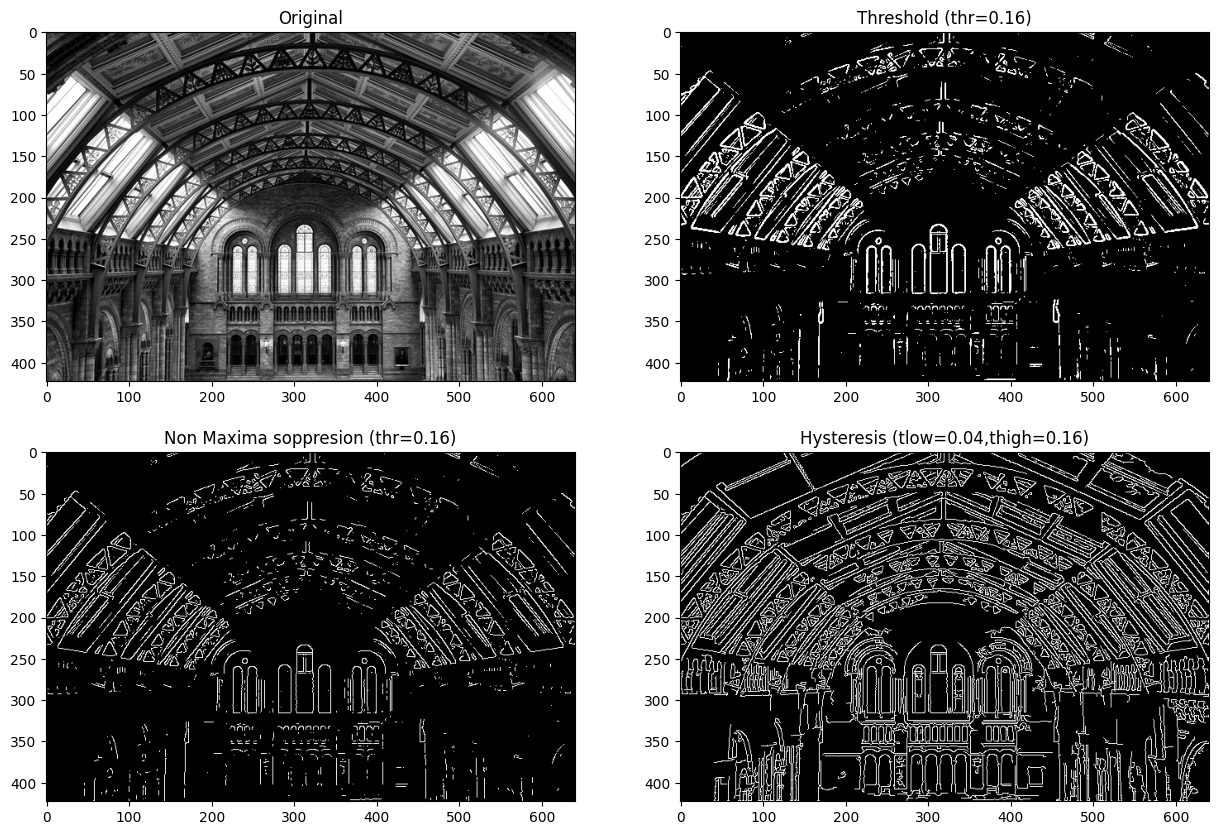

In [552]:
#oepn the image
I = imread_gray('images/museum.jpg')
#turn to int 255



onlyThreshold=findedges1(I,1,0.16)


nonMaxima=nonmaxima(I,1,0.16)


hysteresiss=hysteresis(I,1,0.16,0.04,0.16)


#make a 2 wide 2 tall figure
fig, ax = plt.subplots(2, 2, figsize=(15, 10))

#plot the image
ax[0,0].imshow(I, cmap='gray')
ax[0,0].set_title('Original')

#plot the only threshold
ax[0,1].imshow(onlyThreshold, cmap='gray')
ax[0,1].set_title('Threshold (thr={})'.format(0.16))

#plot the non maxima
ax[1,0].imshow(nonMaxima, cmap='gray')
ax[1,0].set_title('Non Maxima soppresion (thr={})'.format(0.16))

#showw hysteresis
ax[1,1].imshow(hysteresiss, cmap='gray')
ax[1,1].set_title('Hysteresis (tlow={},thigh={})'.format(0.04,0.16))




plt.show()







# Exercize 3 Detecting lines

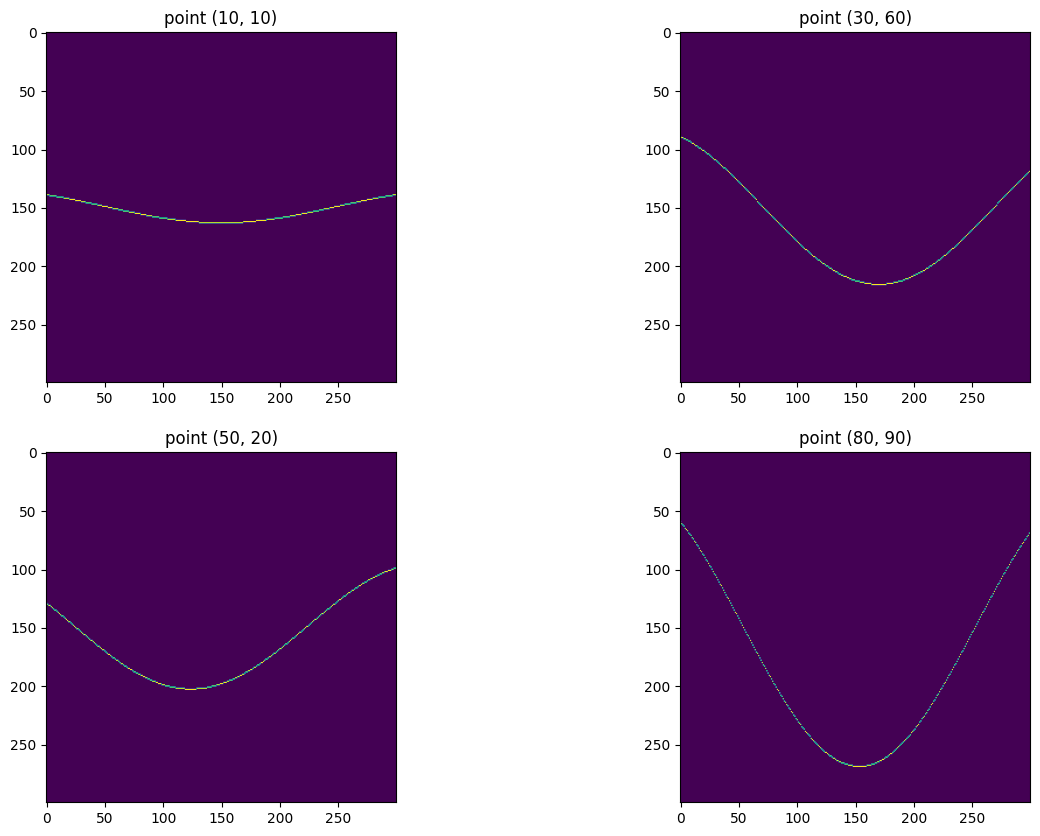

In [553]:
#Hough algorithm
def h(point,accum_size):
    

    accumulatorr=np.zeros((accum_size,accum_size))

    thetas = np.linspace(-np.pi / 2, np.pi , num=accum_size)
    rhos = np.linspace(-accum_size/2, accum_size/2, num=accum_size)



    for i,theta in enumerate(thetas):
        val = (point[0] * np.cos(theta)) + (point[1] * np.sin(theta)) 

        #get the bin of the rho bins are from max rho to min rho
        rho_bin = np.digitize(val, rhos) - 1 

        #check if the bin is in the range
        if rho_bin >= 0 and rho_bin < accum_size:

            #increment the accumulator
            accumulatorr[rho_bin,i] += 1
        
      

    #plot the accumulator
    return accumulatorr


points=[]
points.append((10,10))
points.append((30,60))
points.append((50,20))
points.append((80,90))

#make a 2 wide 2 tall figure
fig, ax = plt.subplots(2, 2, figsize=(15, 10))

x=0
y=0

for point in points:
    accumulatorr=h(point,300)
    ax[x,y].imshow(accumulatorr)
    ax[x,y].set_title('point {}'.format(point))
    y+=1
    if y==2:
        x+=1
        y=0

plt.show()
   






In [554]:
def hough_extract_pairs(A,I, theta_bins, rho_bins, threshold):
   

    D = np.sqrt(I.shape[0]**2 + I.shape[1]**2)

    theta_space = np.linspace(-np.pi / 2, np.pi / 2, theta_bins)
    rho_space = np.linspace(-D, D, rho_bins)

    thresholded = np.asarray(A > threshold).nonzero()
    x_i = thresholded[1]
    y_i = thresholded[0]

    pairs = []

    for i in range(len(x_i)):
    
        theta = theta_space[x_i[i]]
        rho = rho_space[y_i[i]]

        pairs.append((rho, theta, A[y_i[i], x_i[i]]))
    

    return pairs

In [555]:
def hough_find_lines(B,num_of_thetha_bins,num_of_rho_bins,threshold):
    #we get a binary image
    #we get the number of thetha bins
    #we get the number of rho bins

    #Create an accumulator matrix A for the parameter space (ρ,θ).
    #  Parameter θ is defined in the interval from −π/2 to π/2, RHO is defined on the interval from −D to D,
    #  where D is the length of the image diagonal.

    A=np.zeros((num_of_rho_bins,num_of_thetha_bins))

    #get the thetha bins
    thetas = np.linspace(-np.pi / 2, np.pi/2 , num=num_of_thetha_bins)

    # RHO is defined on the interval from −D to D
    #get the rho bins
    D=np.sqrt(B.shape[0]**2+B.shape[1]**2)
    rhos = np.linspace(-D, D, num=num_of_rho_bins)


    #for each pixel NON ZERO in the image
    for i in range(B.shape[0]):
        for j in range(B.shape[1]):
            if B[i,j]!=0:
                #for each thetha
                for k,theta in enumerate(thetas):
                    #calculate the rho
                    val = (j * np.cos(theta)) + (i * np.sin(theta)) 

                    #get the bin of the rho bins are from max rho to min rho
                    rho_bin = np.digitize(val, rhos)



                    #check if the bin is in the range
                    if rho_bin >= 0 and rho_bin < num_of_rho_bins:


                        #increment the accumulator
                        A[rho_bin,k] += 1


    #apply the threshold
   

    return A

    




In [556]:
from itertools import product


def nonmaxima_suppression_box(A):
    suppressed = A.copy()
    for (i, j), pixel_val in np.ndenumerate(A):
        neighbors = product(
            [(i-1)%A.shape[0], i, (i+1)%A.shape[0]], # % img.shape to wrap around image
            [(j-1)%A.shape[1], j, (j+1)%A.shape[1]]
        )
        for u, v in neighbors:
            if pixel_val < A[u, v]:
                suppressed[i, j] = 0 # not a maximum, suppress!
    return suppressed
        

    

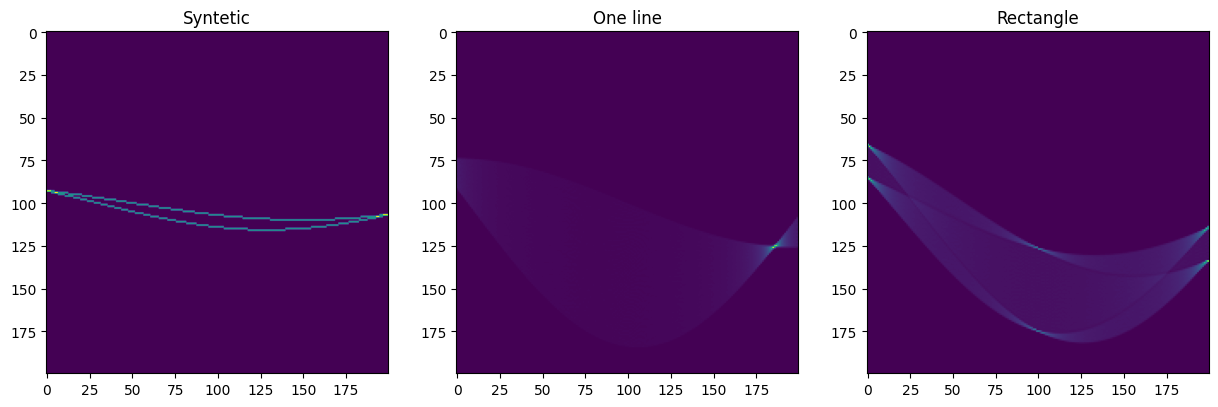

In [557]:
#open image

#00 × 100 black image, with two white pixels at (10, 10) and (10, 20))
I0 = np.zeros((100, 100))
I0[10, 10] = 1
I0[10, 20] = 1

#add gaussian blur


I1 = imread_gray('images/oneline.png')
I2  = imread_gray('images/rectangle.png')

#detect the edges
edges0=I0
edges1=findedges1(I1,1,0.16)
edges2=hysteresis(I2,1,0.16,0.04,0.16)

#find the lines
lines0=hough_find_lines(edges0,200,200,0)
lines1=hough_find_lines(edges1,200,200,0)
lines2=hough_find_lines(edges2,200,200,0)

#make a 2 wide 2 tall figure
fig, ax = plt.subplots(1, 3, figsize=(15, 10))

#plot lines
ax[0].imshow(lines0)
ax[0].set_title('Syntetic')

#plot lines2
ax[1].imshow(lines1)
ax[1].set_title('One line')

#plot lines0
ax[2].imshow(lines2)
ax[2].set_title('Rectangle')

plt.show()



#draw the lines on the image
#make plots 









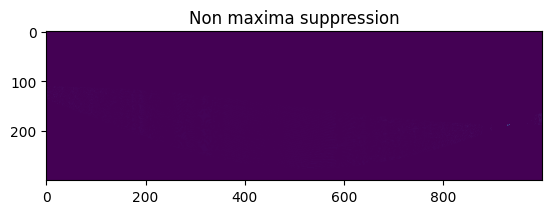

In [558]:
I1 = imread_gray('images/oneline.png')

#detect edges
edges1=findedges1(I1,1,0.16)

#find the lines
lines1=hough_find_lines(edges1,1000,300,0)

#non maxima suppression
lines1_sup=nonmaxima_suppression_box(lines1)
plt.imshow(lines1_sup)
plt.title('Non maxima suppression')
plt.show()









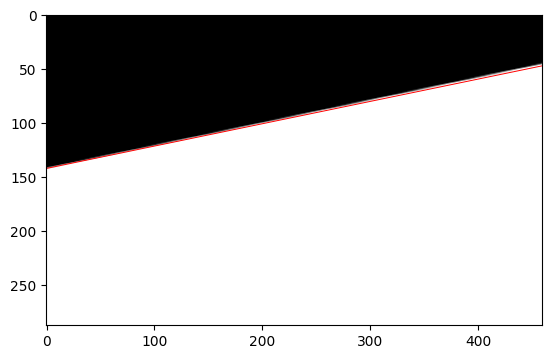

In [559]:
plt.imshow(I1,cmap='gray')
pairs=hough_extract_pairs(lines1_sup,edges1,1000,300,1222)
for pair in pairs:
    draw_line(pair[0],pair[1],I1.shape[0],I1.shape[1])
plt.show()

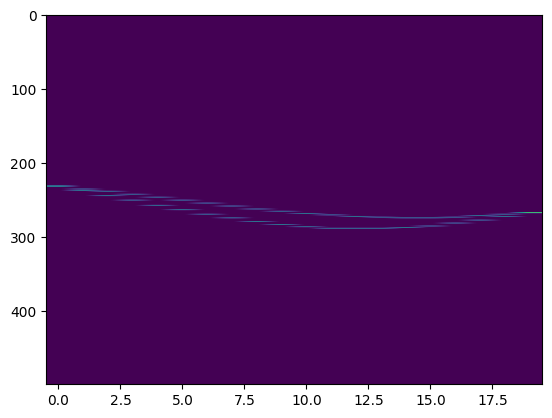

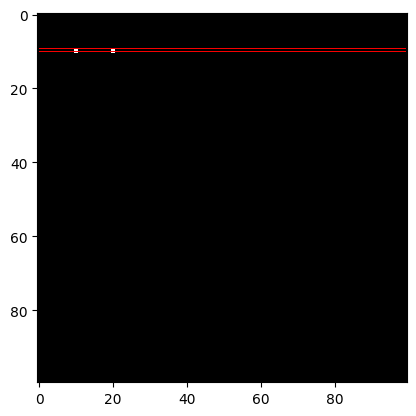

In [560]:
I0 = np.zeros((100, 100))
I0[10, 10] = 1
I0[10, 20] = 1

#get lines
lines0=hough_find_lines(I0,20,500,0)

#non maxima suppression
lines0_sup=nonmaxima_suppression_box(lines0)
plt.imshow(lines0_sup,aspect='auto')

plt.show()

#get max value of the accumulator
max_val=np.max(lines0_sup)


pairs=hough_extract_pairs(lines0_sup,I0,20,500,max_val-1)

plt.imshow(I0,cmap='gray')

for pair in pairs:
    draw_line(pair[0],pair[1],I0.shape[0],I0.shape[1])
plt.show()



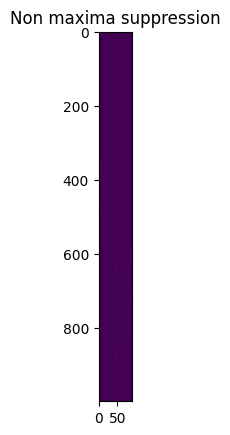

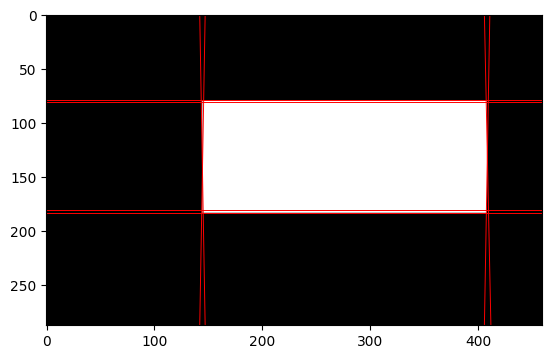

In [561]:
I2  = imread_gray('images/rectangle.png')

#detect edges
edges2=hysteresis(I2,1,0.16,0.04,0.16)

#find the lines
lines2=hough_find_lines(edges2,90,1000,0)

#non maxima suppression
lines2_sup=nonmaxima_suppression_box(lines2)

plt.imshow(lines2_sup)
plt.title('Non maxima suppression')

plt.show()


#get max value of the accumulator
max_val=np.max(lines2_sup)

pairs=hough_extract_pairs(lines2_sup,edges2,90,1000,64)

plt.imshow(I2,cmap='gray')

for pair in pairs:
    draw_line(pair[0],pair[1],I2.shape[0],I2.shape[1])
plt.show()



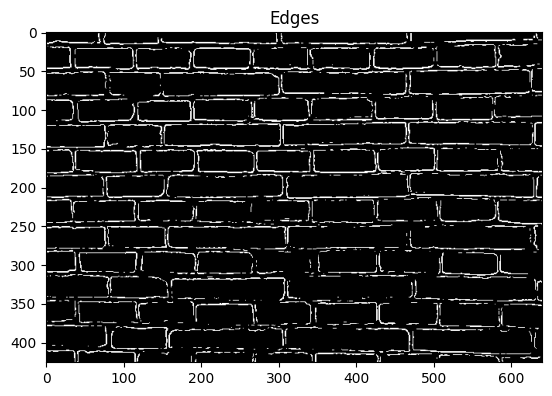

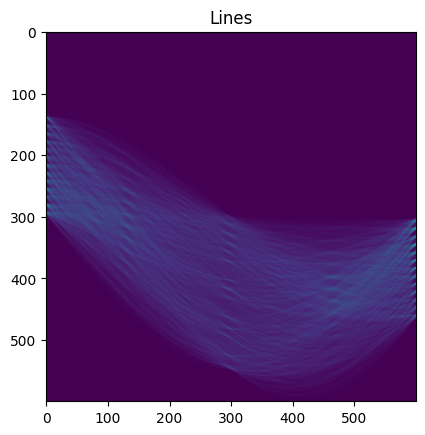

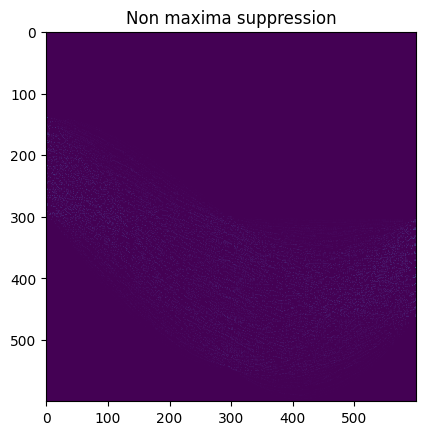

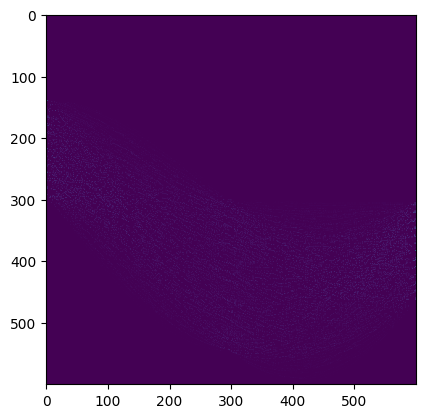

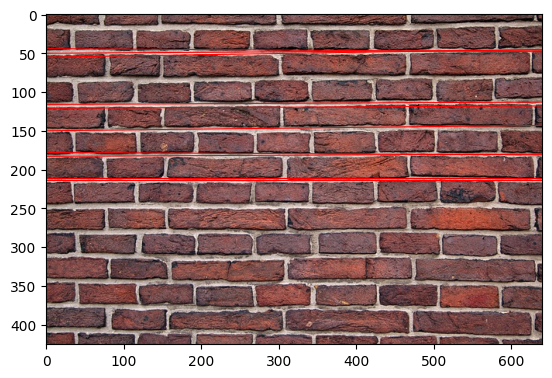

In [562]:
#read bricks image

brickI=imread_gray('images/bricks.jpg')

#detect edges
edges= findedges1(brickI,1,0.2)

plt.imshow(edges,cmap='gray')
plt.title('Edges')

plt.show()


#find the lines
lines=hough_find_lines(edges,600,600,0)

plt.imshow(lines)
plt.title('Lines')

plt.show()



#non maxima suppression
lines_sup=nonmaxima_suppression_box(lines)

plt.imshow(lines_sup)
plt.title('Non maxima suppression')

plt.show()

plt.imshow(lines_sup)

plt.show()

#get max value of the accumulator
max_val=np.max(lines_sup)

pairs=hough_extract_pairs(lines_sup,edges,600,600,0)


#sort pair based on the accumulator value 
pairs.sort(key=lambda x: x[2], reverse=True)


brickI=imread('images/bricks.jpg')
plt.imshow(brickI)

for pair in pairs[:10]:
    draw_line(pair[0],pair[1],brickI.shape[0],brickI.shape[1])

plt.show()



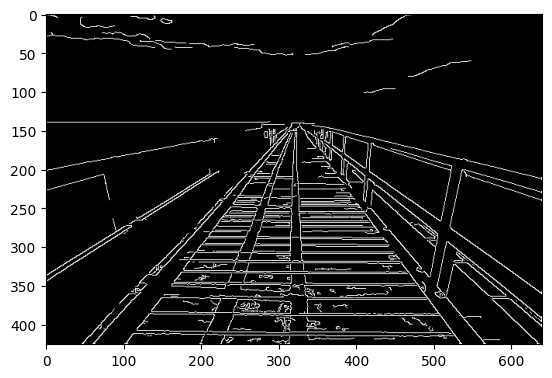

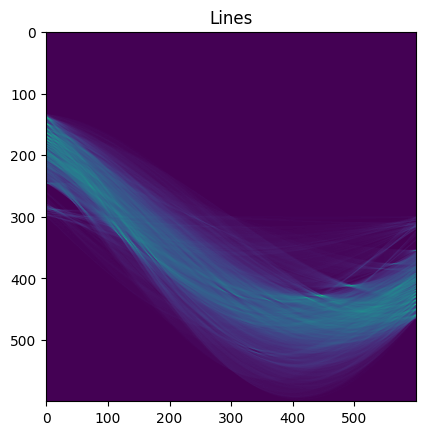

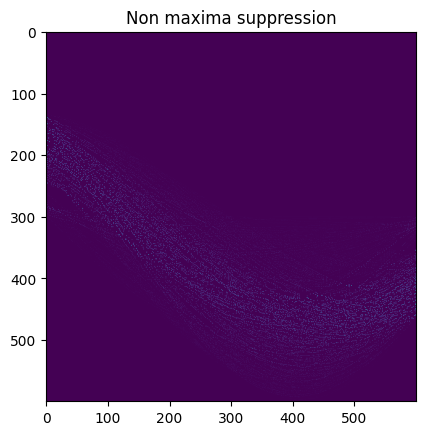

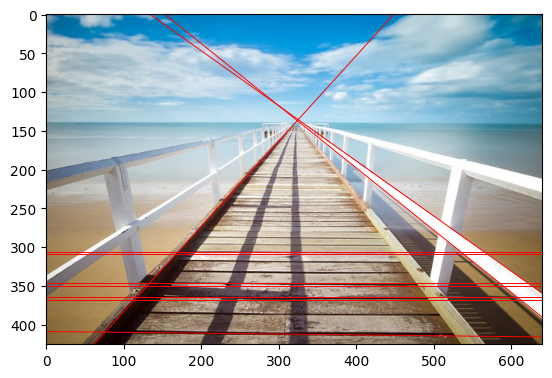

In [563]:
#open pier.jpg
pierI=imread_gray('images/pier.jpg')

#detect edges
edges= hysteresis(pierI,1,0.2,0.04,0.10)

plt.imshow(edges,cmap='gray')

plt.show()

#find the lines
lines=hough_find_lines(edges,600,600,0)

plt.imshow(lines)
plt.title('Lines')
plt.show()

#non maxima suppression
lines_sup=nonmaxima_suppression_box(lines)

plt.imshow(lines_sup)
plt.title('Non maxima suppression')
plt.show()

#get max value of the accumulator
max_val=np.max(lines_sup)

pairs=hough_extract_pairs(lines_sup,edges,600,600,0)


#sort pair based on the accumulator value
pairs.sort(key=lambda x: x[2], reverse=True)

pierI=imread('images/pier.jpg')

plt.imshow(pierI)

for pair in pairs[:10]:
    draw_line(pair[0],pair[1],pierI.shape[0],pierI.shape[1])

plt.show()